# Importing Dependencies and reading .csv file

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import *

import warnings
warnings.filterwarnings('ignore')


mouse_data = "/Users/cla/Desktop/UM Data Science/Homework/05-Matplot/matplotlib-challenge/mouse_drug_data.csv"
clinical_data = "/Users/cla/Desktop/UM Data Science/Homework/05-Matplot/matplotlib-challenge/clinicaltrial_data.csv"

md = pd.read_csv(mouse_data)
cd = pd.read_csv(clinical_data)


In [3]:
md.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
cd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Merging the two df

In [5]:
cd_md = pd.merge(cd, md)

In [6]:
cd_md.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
cdmd_df = cd_md.rename(columns={'Mouse ID':'Mouse_ID','Tumor Volume (mm3)':'Tumor_Volume_mm3',
                                   'Metastatic Sites':'Metastatic_Sites'})
cdmd_df.head(5)

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Mean of the data

In [8]:
mean_tumorvol = cdmd_df.groupby(['Drug', 'Timepoint']).mean()
del mean_tumorvol['Metastatic_Sites']

In [9]:
mean_tumorvol.head(10)

Tumor_Volume_mm3
Drug      Timepoint                  
Capomulin 0                 45.000000
          5                 44.266086
          10                43.084291
          15                42.064317
          20                40.716325
          25                39.939528
          30                38.769339
          35                37.816839
          40                36.958001
          45                36.236114

# Sem of the data

In [10]:
stderr_tumorvol = cdmd_df.groupby(['Drug', 'Timepoint']).sem()
del stderr_tumorvol['Metastatic_Sites']
del stderr_tumorvol['Mouse_ID']

In [11]:
stderr_tumorvol.head(10)

Tumor_Volume_mm3
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.448593
          10                 0.702684
          15                 0.838617
          20                 0.909731
          25                 0.881642
          30                 0.934460
          35                 1.052241
          40                 1.223608
          45                 1.223977

# Pivot tables and filtering treatments

In [12]:
table = pd.pivot_table(mean_tumorvol, values='Tumor_Volume_mm3', index=['Timepoint'],columns=['Drug'])

In [13]:
table_mean = table[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
table_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [14]:
table2 = pd.pivot_table(stderr_tumorvol, values='Tumor_Volume_mm3', index=['Timepoint'],columns=['Drug'])

In [15]:
table_sem = table2[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
table_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


# 1 - Error bar: Tumor volume changes over time for each treatment

<IPython.core.display.Javascript object>


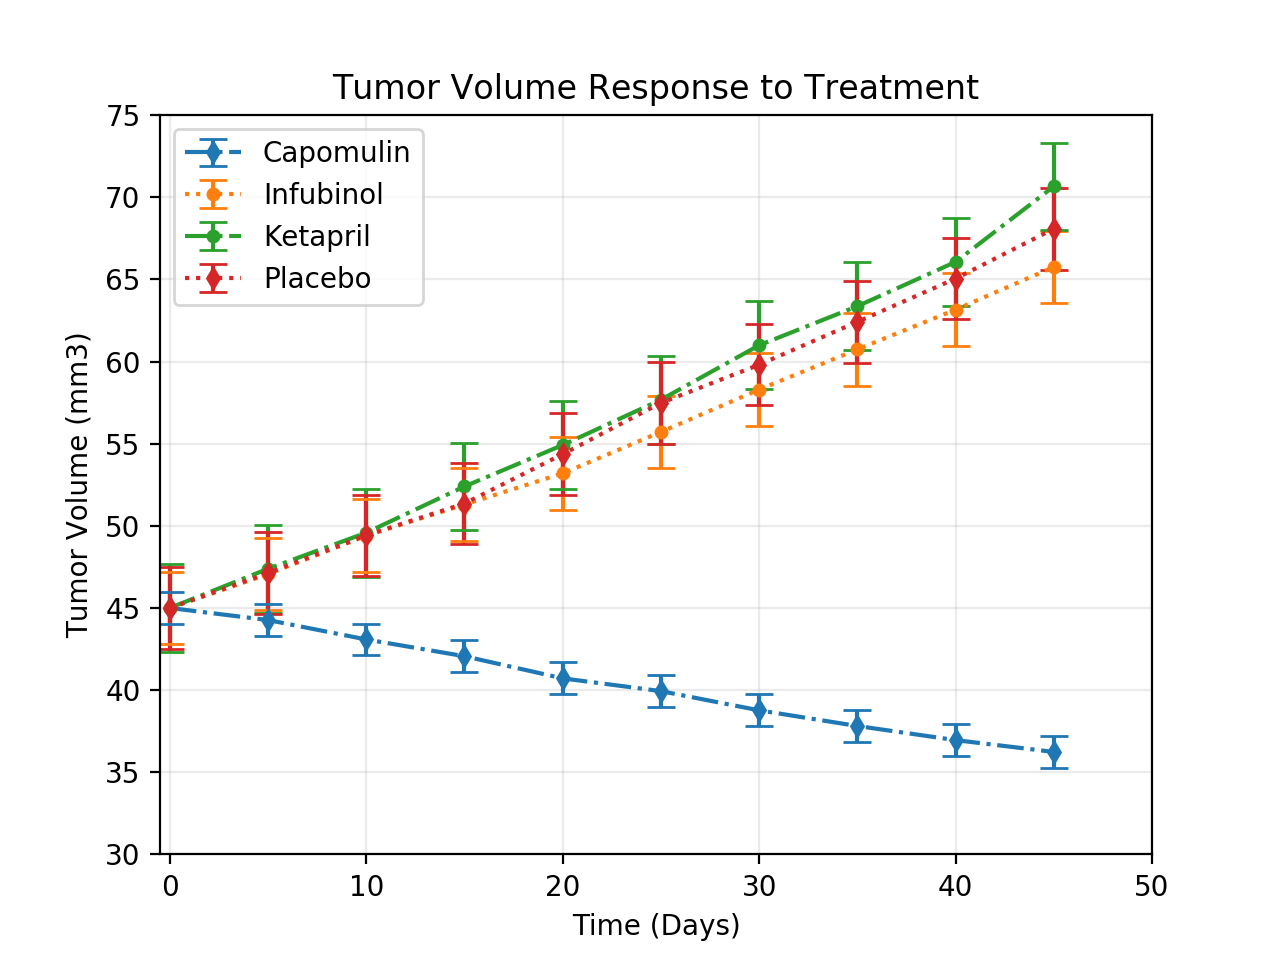

In [16]:
capomulin_sem = table_mean['Capomulin'].sem()
infubinol_sem = table_mean['Infubinol'].sem()
ketapril_sem = table_mean['Ketapril'].sem()
placebo_sem = table_mean['Placebo'].sem()

fig,ax = plt.subplots()
ax.errorbar(table_mean.index,table_mean['Capomulin'],yerr=capomulin_sem,label='Capomulin',marker='d',linestyle='-.',markersize=5,capsize=5)
ax.errorbar(table_mean.index,table_mean['Infubinol'],yerr=infubinol_sem,label='Infubinol',marker='.',linestyle=':',markersize=8,capsize=5)
ax.errorbar(table_mean.index,table_mean['Ketapril'],yerr=ketapril_sem,label='Ketapril',marker='.',linestyle='-.',markersize=8,capsize=5)
ax.errorbar(table_mean.index,table_mean['Placebo'],yerr=placebo_sem,label='Placebo',marker='d',linestyle=':',markersize=5,capsize=5)
ax.legend(loc='best')
ax.set_xlim(-0.5, 50)
ax.set_ylim(30, 75)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(alpha=0.25)
plt.title('Tumor Volume Response to Treatment')
plt.show()
fig.savefig("Figure1.png")


# 

# 2 - Error bar: Metastatic sites changes over time for each treatment.

In [17]:
mean_metastatic = cdmd_df.groupby(['Drug', 'Timepoint']).mean()
del mean_metastatic['Tumor_Volume_mm3']
mean_metastatic.head(10)

Metastatic_Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [18]:
sem_metastatic = cdmd_df.groupby(['Drug', 'Timepoint']).sem()
del sem_metastatic['Tumor_Volume_mm3']
del sem_metastatic['Mouse_ID']
sem_metastatic.head(10)

Metastatic_Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [19]:
table3 = pd.pivot_table(mean_metastatic, values='Metastatic_Sites', index=['Timepoint'],columns=['Drug'])
table_metastatic_mean = table3[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
table_metastatic_mean


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


<IPython.core.display.Javascript object>


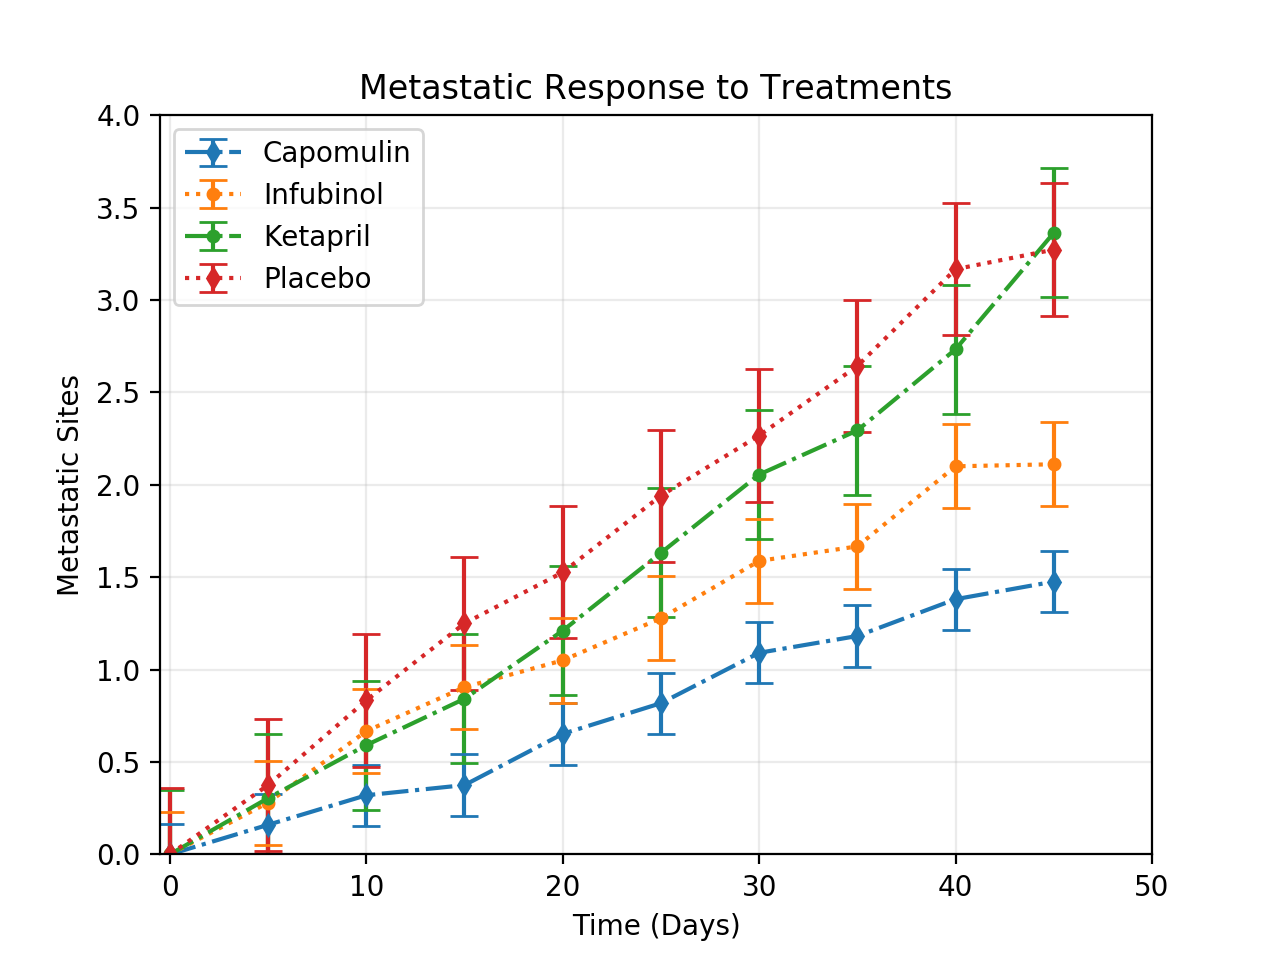

In [20]:
met_capomulin_sem = table_metastatic_mean['Capomulin'].sem()
met_infubinol_sem = table_metastatic_mean['Infubinol'].sem()
met_ketapril_sem = table_metastatic_mean['Ketapril'].sem()
met_placebo_sem = table_metastatic_mean['Placebo'].sem()

fig,ax = plt.subplots()
ax.errorbar(table_metastatic_mean.index,table_metastatic_mean['Capomulin'],yerr=met_capomulin_sem,label='Capomulin',marker='d',linestyle='-.',markersize=5,capsize=5)
ax.errorbar(table_metastatic_mean.index,table_metastatic_mean['Infubinol'],yerr=met_infubinol_sem,label='Infubinol',marker='.',linestyle=':',markersize=8,capsize=5)
ax.errorbar(table_metastatic_mean.index,table_metastatic_mean['Ketapril'],yerr=met_ketapril_sem,label='Ketapril',marker='.',linestyle='-.',markersize=8,capsize=5)
ax.errorbar(table_metastatic_mean.index,table_metastatic_mean['Placebo'],yerr=met_placebo_sem,label='Placebo',marker='d',linestyle=':',markersize=5,capsize=5)
ax.legend(loc='best')
ax.set_xlim(-0.5, 50)
ax.set_ylim(0, 4)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Metastatic Sites')
ax.grid(alpha=0.25)
plt.title('Metastatic Response to Treatments')
plt.show()
fig.savefig("Figure2.png")

# 3 -Error bar: Number of mice still alive through the course of treatment (Survival Rate)

In [21]:
survival_rate = cdmd_df.groupby(['Drug', 'Timepoint']).Mouse_ID.count()
survival_rate_df = survival_rate.to_frame()
survival_rate_df.head(5)

Mouse_ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [22]:
table4 = pd.pivot_table(survival_rate_df, values='Mouse_ID', index=['Timepoint'],columns=['Drug'])
table_survival_mean = table4[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
table_survival_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


<IPython.core.display.Javascript object>


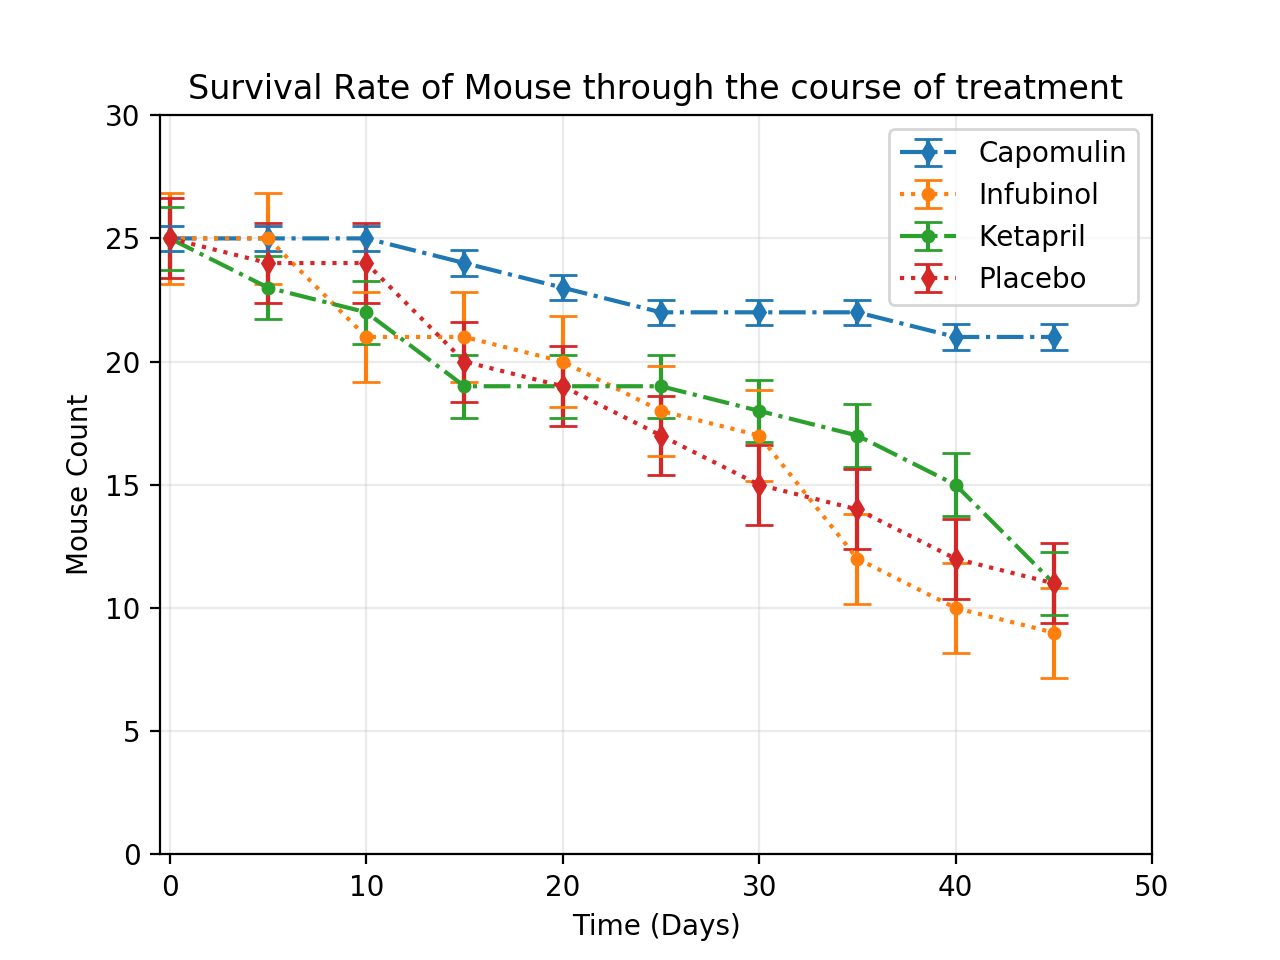

In [23]:
surv_capomulin_sem = table_survival_mean['Capomulin'].sem()
surv_infubinol_sem = table_survival_mean['Infubinol'].sem()
surv_ketapril_sem = table_survival_mean['Ketapril'].sem()
surv_placebo_sem = table_survival_mean['Placebo'].sem()

fig,ax = plt.subplots()
ax.errorbar(table_survival_mean.index,table_survival_mean['Capomulin'],yerr=surv_capomulin_sem,label='Capomulin',marker='d',linestyle='-.',markersize=5,capsize=5)
ax.errorbar(table_survival_mean.index,table_survival_mean['Infubinol'],yerr=surv_infubinol_sem,label='Infubinol',marker='.',linestyle=':',markersize=8,capsize=5)
ax.errorbar(table_survival_mean.index,table_survival_mean['Ketapril'],yerr=surv_ketapril_sem,label='Ketapril',marker='.',linestyle='-.',markersize=8,capsize=5)
ax.errorbar(table_survival_mean.index,table_survival_mean['Placebo'],yerr=surv_placebo_sem,label='Placebo',marker='d',linestyle=':',markersize=5,capsize=5)
ax.legend(loc='best')
ax.set_xlim(-0.5, 50)
ax.set_ylim(0, 30)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Mouse Count')
ax.grid(alpha=0.25)
plt.title('Survival Rate of Mouse through the course of treatment')
plt.show()
fig.savefig("Figure3.png")

# 4

In [24]:
table_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [25]:
difference = (table.iloc[[0, 9]].diff()/ 45*100).round(6)
difference = difference.drop([0], axis=0)
difference 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
45,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


<IPython.core.display.Javascript object>


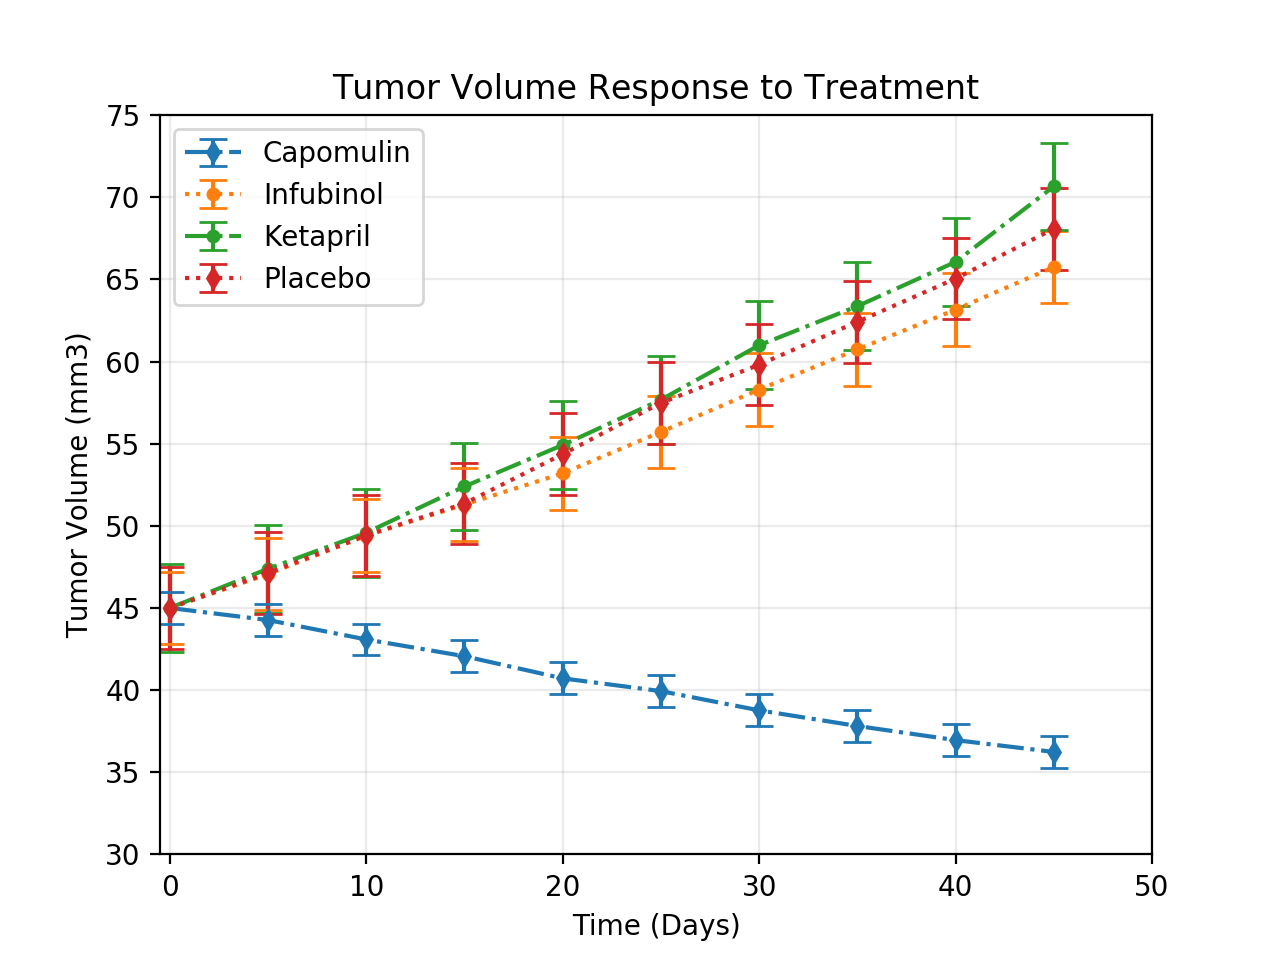

In [29]:

capomulin_sem = table_mean['Capomulin'].sem()
infubinol_sem = table_mean['Infubinol'].sem()
ketapril_sem = table_mean['Ketapril'].sem()
placebo_sem = table_mean['Placebo'].sem()



#plot with errors graph
fig,ax = plt.subplots()

ax.errorbar(table_mean.index,table_mean['Capomulin'],yerr=capomulin_sem,label='Capomulin',marker='d',linestyle='-.',markersize=5,capsize=5)
ax.errorbar(table_mean.index,table_mean['Infubinol'],yerr=infubinol_sem,label='Infubinol',marker='.',linestyle=':',markersize=8,capsize=5)
ax.errorbar(table_mean.index,table_mean['Ketapril'],yerr=ketapril_sem,label='Ketapril',marker='.',linestyle='-.',markersize=8,capsize=5)
ax.errorbar(table_mean.index,table_mean['Placebo'],yerr=placebo_sem,label='Placebo',marker='d',linestyle=':',markersize=5,capsize=5)

ax.legend(loc='best')
ax.set_xlim(-0.5, 50)
ax.set_ylim(30, 75)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(alpha=0.25)

plt.title('Tumor Volume Response to Treatment')
plt.show()

fig.savefig("Figure1.png")